# Dataset

In [ ]:
# Dataset
# https://www.kaggle.com/datasets/olgabelitskaya/flower-color-images

# Load dataset

In [ ]:
!sudo apt-get install fastjar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fastjar
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 66.7 kB of archives.
After this operation, 175 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fastjar amd64 2:0.98-6build1 [66.7 kB]
Fetched 66.7 kB in 0s (185 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-pr

In [ ]:
!jar xvf archive.zip

 inflated: FlowerColorImages.h5
 inflated: flower_images/flower_images/0001.png
 inflated: flower_images/flower_images/0002.png
 inflated: flower_images/flower_images/0003.png
 inflated: flower_images/flower_images/0004.png
 inflated: flower_images/flower_images/0005.png
 inflated: flower_images/flower_images/0006.png
 inflated: flower_images/flower_images/0007.png
 inflated: flower_images/flower_images/0008.png
 inflated: flower_images/flower_images/0009.png
 inflated: flower_images/flower_images/0010.png
 inflated: flower_images/flower_images/0011.png
 inflated: flower_images/flower_images/0012.png
 inflated: flower_images/flower_images/0013.png
 inflated: flower_images/flower_images/0014.png
 inflated: flower_images/flower_images/0015.png
 inflated: flower_images/flower_images/0016.png
 inflated: flower_images/flower_images/0017.png
 inflated: flower_images/flower_images/0018.png
 inflated: flower_images/flower_images/0019.png
 inflated: flower_images/flower_images/0020.png
 inflate

In [ ]:
# Import
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

import tensorflow.dtensor
import torch
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf #An end-to-end machine learning platform, focusing on training deep learning models
from tensorflow.keras import layers, losses # Implementation of the Keras API, the high-level API of TensorFlow.
from tensorflow.keras.models import Model #This displays graphs
# from tensorflow.keras.applications.vgg16 import preprocess_input

import torchvision.transforms as transforms
from PIL import Image

# Load images

In [ ]:
path = '/content/flower_images/flower_images'
os.chdir(path)
flowers_file = []

In [ ]:
with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.png'):
            flowers_file.append(file.name)

In [ ]:
print(flowers_file)

['0106.png', '0077.png', '0188.png', '0090.png', '0159.png', '0059.png', '0116.png', '0075.png', '0185.png', '0016.png', '0027.png', '0105.png', '0169.png', '0073.png', '0078.png', '0043.png', '0034.png', '0091.png', '0125.png', '0099.png', '0076.png', '0081.png', '0039.png', '0052.png', '0146.png', '0087.png', '0121.png', '0132.png', '0013.png', '0182.png', '0060.png', '0098.png', '0165.png', '0020.png', '0092.png', '0071.png', '0042.png', '0097.png', '0050.png', '0164.png', '0145.png', '0147.png', '0177.png', '0160.png', '0049.png', '0180.png', '0023.png', '0171.png', '0139.png', '0206.png', '0093.png', '0148.png', '0101.png', '0122.png', '0194.png', '0163.png', '0103.png', '0082.png', '0201.png', '0197.png', '0095.png', '0064.png', '0057.png', '0130.png', '0032.png', '0203.png', '0035.png', '0089.png', '0200.png', '0191.png', '0107.png', '0128.png', '0187.png', '0037.png', '0046.png', '0162.png', '0084.png', '0135.png', '0067.png', '0176.png', '0108.png', '0033.png', '0083.png', '01

In [ ]:
images_train = []
images_test = []

for i in range(168):
  image = load_img(flowers_file[i], target_size=(224,224))
  image = np.array(image)
  images_train.append(image)

for i in range(168,len(flowers_file)):
  image = load_img(flowers_file[i], target_size=(224,224))
  image = np.array(image)
  images_test.append(image)

images_train = np.array(images_train)
images_test = np.array(images_test)

In [ ]:
images_train.shape

(168, 224, 224, 3)

In [ ]:
rows = 1
columns = 5

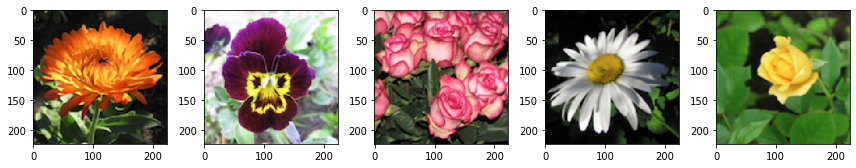

In [ ]:
fig = plt.figure(figsize=(12, 12))
for i in range(columns):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(images_train[i], vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [ ]:
#flowers = preprocess_input(images)

#Gray Scaling

In [ ]:
transform_gray_scale = transforms.Grayscale()

In [ ]:
images_train = images_train.transpose(0, 3, 1,2)
images_test = images_test.transpose(0, 3, 1,2)

In [ ]:
images_train = torch.from_numpy(images_train)
images_test = torch.from_numpy(images_test)

In [ ]:
images_train.shape

torch.Size([168, 3, 224, 224])

In [ ]:
images_test.shape

torch.Size([42, 3, 224, 224])

In [ ]:
gray_images_train = (images_train)
gray_images_test = (images_test)

In [ ]:
gray_images_train.shape

torch.Size([168, 3, 224, 224])

In [ ]:
gray_images_test.shape

torch.Size([42, 3, 224, 224])

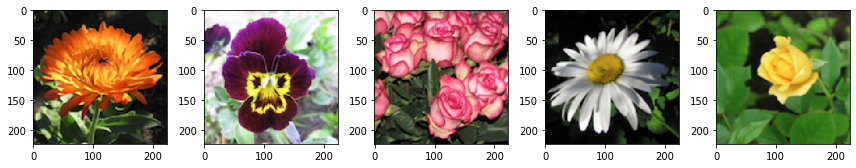

In [ ]:
fig = plt.figure(figsize=(12, 12))
for i in range(columns):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(np.array(gray_images_train[i]).transpose(1,2,0))
plt.tight_layout()
plt.show()

# Image resizing

In [ ]:
size = 56

In [ ]:
transformResize = transforms.Resize(size)

In [ ]:
images_resized_train = transformResize(gray_images_train)
images_resized_test = transformResize(gray_images_test)

In [ ]:
images_resized_train.shape

torch.Size([168, 3, 56, 56])

In [ ]:
images_resized_test.shape

torch.Size([42, 3, 56, 56])

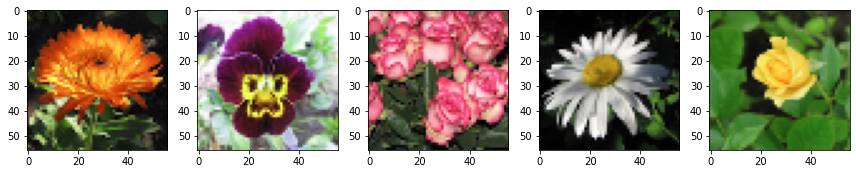

In [ ]:
fig = plt.figure(figsize=(12, 12))
for i in range(columns):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(np.array(images_resized_train[i]).transpose(1,2,0))
plt.tight_layout()
plt.show()

# Normalization

In [ ]:
images_train_pre = images_resized_train/255
# images_train_pre = np.array(images_train_pre.reshape(len(images_train_pre),size,size))
images_train_pre = np.array(images_train_pre).transpose(0,2,3,1)

images_test_pre = images_resized_test/255
# images_test_pre = np.array(images_test_pre.reshape(len(images_test_pre),size,size))
images_test_pre = np.array(images_test_pre).transpose(0,2,3,1)

In [ ]:
images_train_pre.shape

(168, 56, 56, 3)

In [ ]:
images_test_pre.shape

(42, 56, 56, 3)

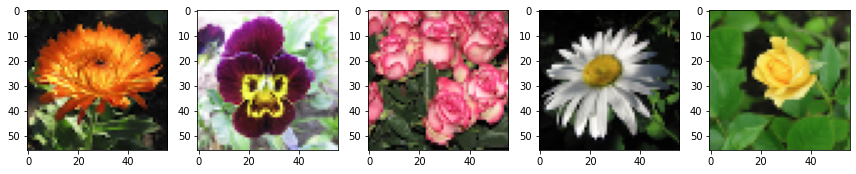

In [ ]:
fig = plt.figure(figsize=(12, 12))
for i in range(columns):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(np.array(images_train_pre[i]))
plt.tight_layout()
plt.show()

# Autoencoder

In [ ]:
images_train_pre.shape

(168, 56, 56, 3)

In [ ]:
latent_dim = 64 # the number of features to be encoded, this can change
# num, length, width  = images_train_pre.shape

In [ ]:
# images_train_pre.shape

In [ ]:
# need to document how excatly it works

class AutoEncoder0(Model):
  def __init__(self, latent_dim):
    super(AutoEncoder0, self).__init__()
    self.latent_dim = latent_dim
    # The NN is defined in two parts:encoder and decoder
    # Encoder part:
    self.encoder = tf.keras.Sequential([
      layers.Flatten(), # Input layer-- flattens image into vector
      layers.Dense(latent_dim, activation='relu'), # Dense hidden layer
    ])
    # Decoder part of the NN
    self.decoder = tf.keras.Sequential([
      layers.Dense(length*width, activation='sigmoid'), # Dense hidden layer
      layers.Reshape((length, width)) # Output layer (reshapes vector back to image size)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential ([
            layers.InputLayer(input_shape=(56,56,3)),
            layers.Conv2D(16, (3,3), 1, padding="same", activation="relu"),
            layers.MaxPool2D((2,2), padding="same", strides=2),
            layers.Conv2D(8, (3,3), 1, padding="same", activation="relu"),
            layers.MaxPool2D((2,2), padding="same", strides=2),
            layers.Flatten()
        ])
        self.decoder = tf.keras.Sequential ([
            layers.InputLayer(input_shape=(1568)),
            layers.Reshape((14, 14, 8)),
            layers.UpSampling2D((2,2)),
            layers.Conv2DTranspose(8, (3,3), 1, padding="same", activation="relu"),
            layers.UpSampling2D((2,2)),
            layers.Conv2DTranspose(16, (3,3), 1, padding="same", activation="relu"),
            layers.Conv2D(1, (3,3), 1, padding="same", activation="sigmoid")
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
#

In [ ]:
model = AutoEncoder()

In [ ]:
model.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
model.build((None, 56,56,3))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2)

In [ ]:
model.fit(np.array(images_train_pre), np.array(images_train_pre),
                epochs=50,
                shuffle=True,
                validation_data=(np.array(images_train_pre), np.array(images_train_pre)), callbacks=[early_stopping])

Epoch 1/50
6/6 [==============================] - 5s 614ms/step - loss: 0.0928 - val_loss: 0.0912
Epoch 2/50
6/6 [==============================] - 2s 304ms/step - loss: 0.0900 - val_loss: 0.0873
Epoch 3/50
6/6 [==============================] - 2s 269ms/step - loss: 0.0855 - val_loss: 0.0822
Epoch 4/50
6/6 [==============================] - 2s 268ms/step - loss: 0.0795 - val_loss: 0.0741
Epoch 5/50
6/6 [==============================] - 2s 273ms/step - loss: 0.0705 - val_loss: 0.0643
Epoch 6/50
6/6 [==============================] - 2s 269ms/step - loss: 0.0614 - val_loss: 0.0567
Epoch 7/50
6/6 [==============================] - 3s 495ms/step - loss: 0.0552 - val_loss: 0.0527
Epoch 8/50
6/6 [==============================] - 2s 273ms/step - loss: 0.0519 - val_loss: 0.0505
Epoch 9/50
6/6 [==============================] - 2s 272ms/step - loss: 0.0498 - val_loss: 0.0487
Epoch 10/50
6/6 [==============================] - 2s 265ms/step - loss: 0.0479 - val_loss: 0.0465
Epoch 11/50
6/6 [==

In [ ]:
images_test_pre.shape

(42, 56, 56, 3)

In [ ]:
encoded_imgs = model.encoder(images_test_pre).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()
print(decoded_imgs.shape)

(42, 56, 56, 1)


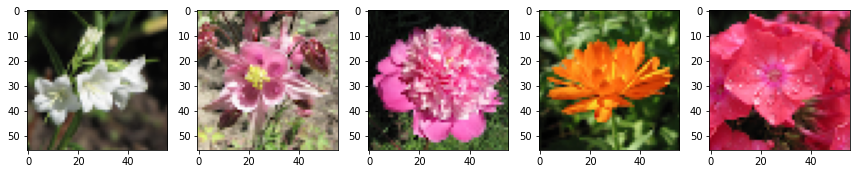

In [ ]:
fig = plt.figure(figsize=(12, 12))
for i in range(columns):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(np.array(images_test_pre[i]))
plt.tight_layout()
plt.show()

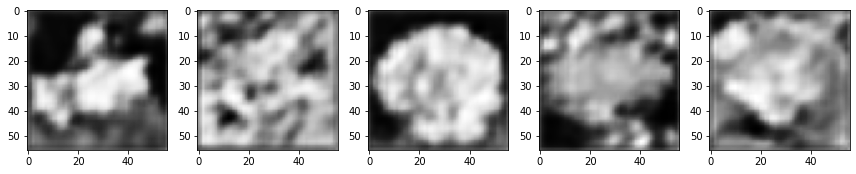

In [ ]:
fig = plt.figure(figsize=(12, 12))
for i in range(columns):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(np.array(decoded_imgs[i]).reshape(56,56), cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1568)              1608      
                                                                 
 sequential_1 (Sequential)   (None, 56, 56, 1)         1897      
                                                                 
Total params: 3,505
Trainable params: 3,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
auto_features_train = model.encoder.predict(images_train_pre)
auto_features_test = model.encoder.predict(images_test_pre)

2/2 [==============================] - 0s 11ms/step


In [ ]:
auto_df_train = pd.DataFrame(auto_features_train) #turning the data into a dataframe
auto_df_test = pd.DataFrame(auto_features_test) #turning the data into a dataframe

In [ ]:
auto_df_train.shape

(168, 1568)

In [ ]:
auto_df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567
0,0.243740,0.000000,0.310703,0.142423,0.343199,0.046093,0.226333,0.179215,0.247037,0.000000,...,0.241022,0.026326,0.241314,0.000000,0.211868,0.143339,0.275877,0.008990,0.195670,0.011365
1,1.805539,0.676824,0.173405,0.443952,1.768400,1.240781,0.000000,1.154607,1.735927,0.806892,...,0.292057,0.490116,1.589778,0.858516,0.137424,0.839833,1.423498,0.928279,0.254013,0.572646
2,1.399809,0.436494,0.154880,0.473593,1.570368,0.944492,0.163751,1.020570,1.484589,0.489692,...,0.192837,0.028692,0.398880,0.123242,0.140454,0.233867,0.445878,0.228308,0.218408,0.103912
3,0.107617,0.000000,0.182932,0.099440,0.159490,0.000000,0.166268,0.035849,0.108153,0.000000,...,0.203630,0.003313,0.200657,0.000000,0.195670,0.213695,0.287299,0.022236,0.220459,0.046000
4,0.457950,0.087495,0.154559,0.089859,0.462120,0.243081,0.211974,0.233729,0.375723,0.112810,...,0.232100,0.104087,0.452865,0.114466,0.198606,0.327228,0.430281,0.220432,0.163156,0.158735


In [ ]:
auto_df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567
0,0.449143,0.000000,0.143845,0.062449,0.362725,0.099501,0.144190,0.208580,0.313519,0.000000,...,0.196004,0.113788,0.392713,0.088764,0.137757,0.229554,0.426835,0.148832,0.154883,0.110728
1,1.270440,0.259317,0.124349,0.189536,1.057039,0.708189,0.002520,0.731799,1.219925,0.402000,...,0.210282,0.356839,1.137583,0.536365,0.133478,0.598628,1.025155,0.759759,0.178427,0.395971
2,0.171944,0.000000,0.206302,0.101362,0.233039,0.000000,0.184312,0.058451,0.166683,0.000000,...,0.200681,0.167861,0.579550,0.229165,0.191419,0.347009,0.571362,0.313754,0.200132,0.242084
3,0.594990,0.140258,0.171042,0.201110,0.548368,0.365628,0.198106,0.333933,0.579395,0.189368,...,0.247170,0.074932,0.458559,0.220433,0.079943,0.212298,0.636010,0.292207,0.186872,0.000000
4,0.183697,0.000000,0.199173,0.077381,0.231021,0.000000,0.162789,0.068229,0.193638,0.000000,...,0.211692,0.595464,1.176918,0.305155,0.117576,0.676333,1.342535,0.693778,0.148416,0.499055


# Clustering

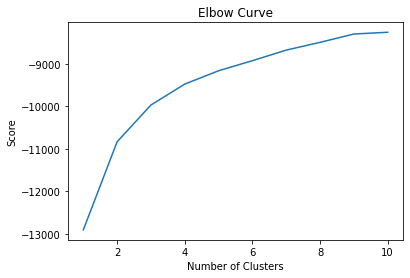

In [ ]:
N = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in N]
kmeans
scores = [kmeans[i].fit(auto_df_train).score(auto_df_train) for i in range(len(kmeans))]

plt.plot(N,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=9).fit(auto_df_train)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.39928916 0.02670153 0.2087045  ... 0.10718483 0.19781855 0.13787523]
 [0.9398666  0.29392296 0.17294635 ... 0.4225548  0.22472937 0.23171563]
 [0.27819186 0.02876936 0.19921564 ... 0.13940349 0.19244815 0.10597786]
 ...
 [0.5175787  0.11885577 0.16681437 ... 0.08528072 0.18479113 0.1041956 ]
 [0.41113076 0.07718559 0.18647936 ... 0.17256948 0.20103815 0.14894745]
 [0.47856092 0.09772512 0.17407107 ... 0.41076335 0.21512055 0.25765032]]


In [ ]:
pred_cluster = kmeans.predict(auto_df_test)

In [ ]:
pred_cluster

array([2, 4, 0, 3, 1, 3, 7, 2, 3, 6, 1, 5, 4, 6, 8, 3, 8, 5, 1, 8, 3, 6,
       0, 5, 8, 6, 5, 4, 1, 5, 4, 0, 6, 4, 5, 3, 6, 3, 5, 4, 2, 3],
      dtype=int32)

In [ ]:
list(pred_cluster).count(1)

4

In [ ]:
groups = np.unique(pred_cluster)

group 1:



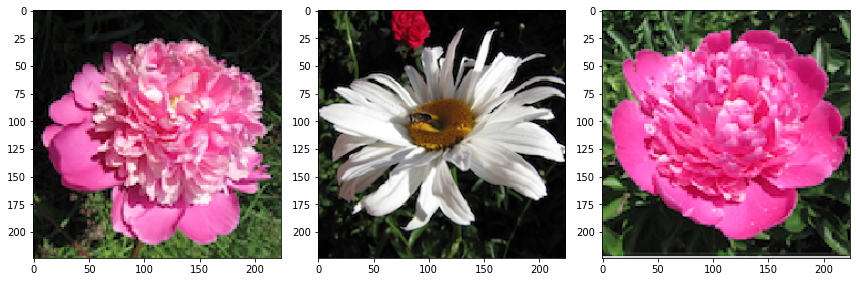

group 2:



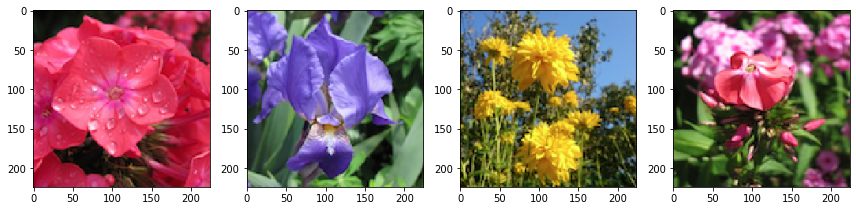

group 3:



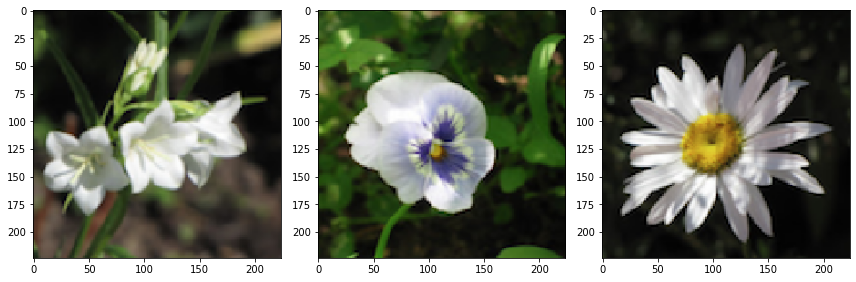

group 4:



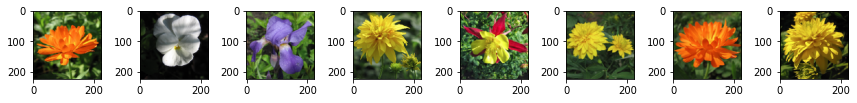

group 5:



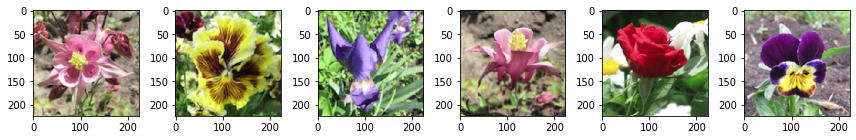

group 6:



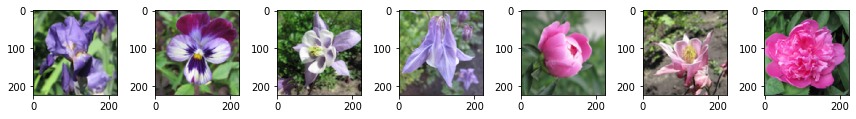

group 7:



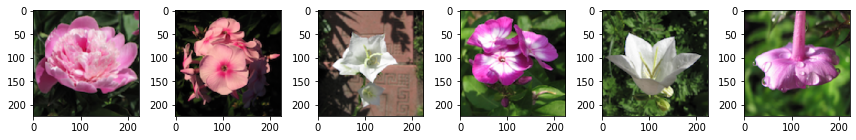

group 8:



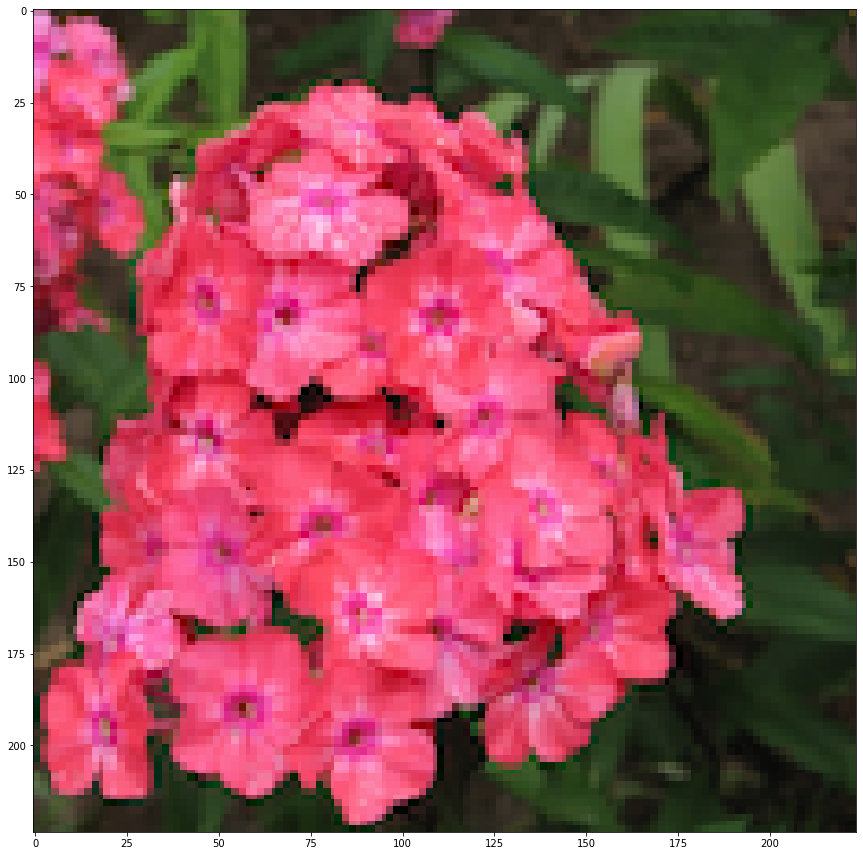

group 9:



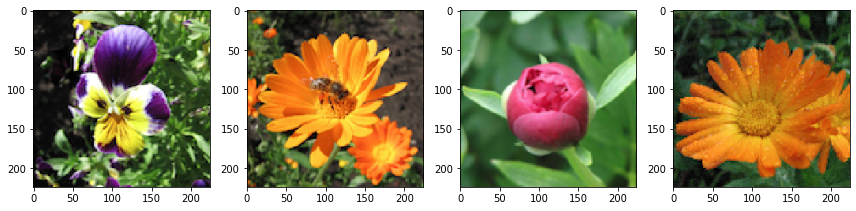

In [ ]:
for i in groups:
  fig = plt.figure(figsize=(12, 12))
  print(f'group {i+1}:\n')
  for j in range(list(pred_cluster).count(i)):
    fig.add_subplot(1, list(pred_cluster).count(i), j+1)
    plt.imshow(np.array(images_test[(pred_cluster == i)][j]).transpose(1,2,0))
  plt.tight_layout()
  plt.show()